In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'AAPL'

# Get the stock data
stock_data = yf.download(ticker_symbol, start='2018-01-01', end='2022-01-01')

# Display the first few rows
df = pd.DataFrame(stock_data)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108681,82271200


In [ ]:
df1 = df.reset_index()['Close']

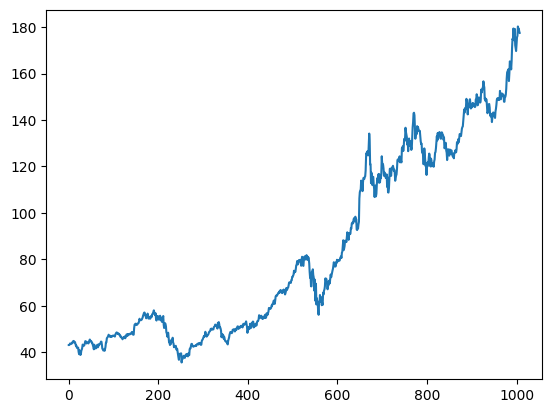

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
train , test =  train_test_split(df1 , test_size = 0.35 , shuffle= False)

In [ ]:
len(train) , len(test)

(655, 353)

In [ ]:
def create_dataset(dataset , time_step = 1):
  dataX , dataY = [] , []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i : (i+time_step) , 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step , 0])
  return np.array(dataX) , np.array(dataY)

In [ ]:
time_step = 100
x_train , y_train = create_dataset(train , time_step)
x_test , y_test = create_dataset(test , time_step)

In [ ]:
x_train.shape

(554, 100)

In [ ]:
x_test.shape

(252, 100)

In [ ]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape = (100 , 1)))
model.add(LSTM(50 , return_sequences = True ))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
9/9 [==============================] - 12s 621ms/step - loss: 0.0092 - val_loss: 0.0666
Epoch 2/100
9/9 [==============================] - 2s 189ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 3/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 4/100
9/9 [==============================] - 2s 195ms/step - loss: 9.6010e-04 - val_loss: 0.0059
Epoch 5/100
9/9 [==============================] - 2s 190ms/step - loss: 6.8994e-04 - val_loss: 0.0020
Epoch 6/100
9/9 [==============================] - 3s 356ms/step - loss: 6.5121e-04 - val_loss: 0.0020
Epoch 7/100
9/9 [==============================] - 5s 520ms/step - loss: 5.9507e-04 - val_loss: 0.0021
Epoch 8/100
9/9 [==============================] - 3s 381ms/step - loss: 5.6498e-04 - val_loss: 0.0028
Epoch 9/100
9/9 [==============================] - 4s 416ms/step - loss: 5.3067e-04 - val_loss: 0.0017
Epoch 10/100
9/9 [==============================] - 4s 412ms/step - loss: 4.9269e-04

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

8/8 [==============================] - 0s 37ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error as mse
math.sqrt(mse(y_train , train_predict))


60.52859253378583

In [ ]:
math.sqrt(mse(y_test , test_predict))


148.7062839138228

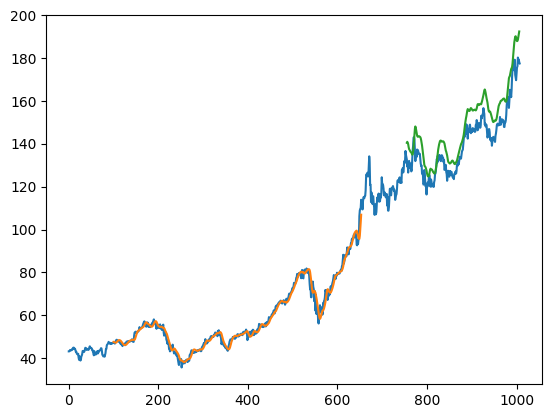

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[1.091389]
101
1 day input [0.78284667 0.78429717 0.79824905 0.79182568 0.76537219 0.76772051
 0.77801185 0.78851039 0.78788869 0.77918601 0.7735223  0.78084371
 0.81206288 0.80315301 0.80784966 0.81572353 0.82021309 0.8367206
 0.82580767 0.81862453 0.78339923 0.78740526 0.77752832 0.78381363
 0.78215594 0.7633001  0.74175056 0.74513488 0.7618497  0.76861845
 0.76924004 0.75853431 0.73463645 0.7409908  0.73180459 0.7397475
 0.71550428 0.7291109  0.73525805 0.74416792 0.74147423 0.74085263
 0.73187362 0.72772954 0.74741418 0.75487365 0.76668452 0.78194874
 0.78540219 0.78692172 0.78146531 0.78111994 0.7858167  0.78257044
 0.80826416 0.78913198 0.7833302  0.79065151 0.80080468 0.79714403
 0.79935418 0.7935524  0.79610793 0.77614696 0.77580159 0.79044431
 0.79051335 0.79742026 0.81461851 0.84487071 0.86338129 0.86662755
 0.86932124 0.87298189 0.8375494  0.86124016 0.89618912 0.89252847
 0.88555242 0.87229116 0.89632729 0.93680169 0.96373871 0.96014709
 0.99392188 0.9682973  0.95855853 0.9

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1008

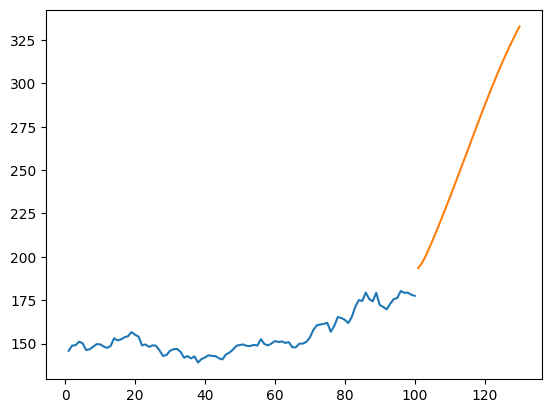

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[908:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

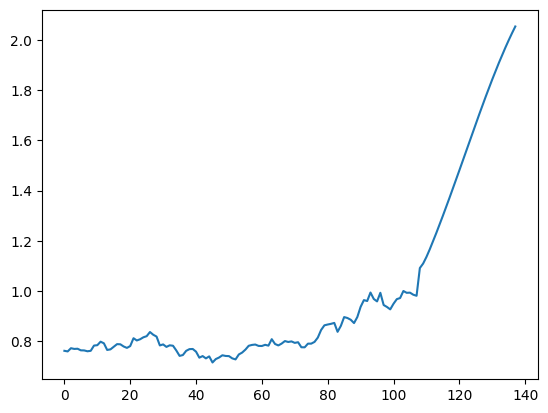

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

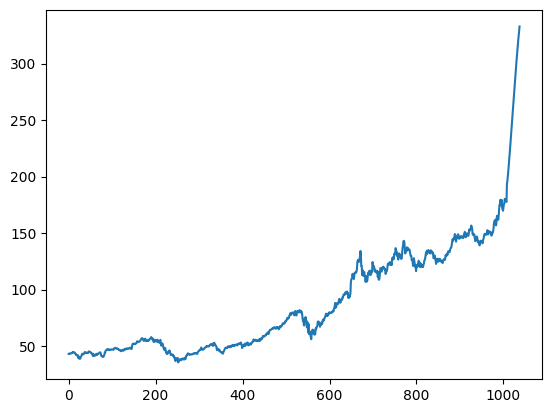

In [ ]:
plt.plot(df3)